In [1]:
import pandas as pd
import numpy as np
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('housepricedata.csv')


In [2]:
import math

if not hasattr(math, "prod"):
    def prod(iterable):
        result = 1
        for x in iterable:
            result *= x
        return result

    math.prod = prod

In [3]:
def F_score(Precision, Recall):
    fscore = 2 * ((Precision * Recall) / (Precision + Recall))
    return fscore
    

In [4]:
def plot_distributions(data, columns, type='boxplot', title=None):

    print("plotting columns {c}".format(c=list(columns)))
  
    maxCols = 4
    
    if len(columns) < 4:
        numCols = len(columns)
    else:
        numCols = maxCols
    numRows = ceil(len(columns) / 4)

    print("grid is {0}x{1}".format(numRows, numCols))

    fig, axs = plt.subplots(numRows, numCols)
    fig.suptitle(title)
    fig.set_figwidth(5*numCols)
    fig.set_figheight(3*numCols)
    fig.tight_layout(pad=5.0)

    print(axs)


    if numRows == 1 and numCols == 1:
        c = columns[0]

        sns.boxplot(data=data, x=c, ax=axs)

        axs.set_title(c)

    elif numRows == 1:
        i = 0

        for c in columns:


            sns.boxplot(data=data, x=c, ax=axs[i])

            axs[i].set_title(c)
            i = i+1

    else:
        i=j=0
        for c in columns:
            print("column {c}".format(c=c))

            print("plotting on axes [{0},{1}]".format(i,j))
            sns.boxplot(data=data, x=c, ax=axs[i,j])
            
            axs[i,j].set_title(c)
            j = j+1
            if j == 4:
                i = i+1
                j= 0

Correlation between AboveMedianPrice and LotArea: 0.19
Correlation between AboveMedianPrice and OverallQual: 0.67
Correlation between AboveMedianPrice and OverallCond: -0.14
Correlation between AboveMedianPrice and TotalBsmtSF: 0.44
Correlation between AboveMedianPrice and FullBath: 0.62
Correlation between AboveMedianPrice and HalfBath: 0.31
Correlation between AboveMedianPrice and BedroomAbvGr: 0.14
Correlation between AboveMedianPrice and TotRmsAbvGrd: 0.42
Correlation between AboveMedianPrice and Fireplaces: 0.42
Correlation between AboveMedianPrice and GarageArea: 0.51
Correlation between AboveMedianPrice and AboveMedianPrice: 1.00


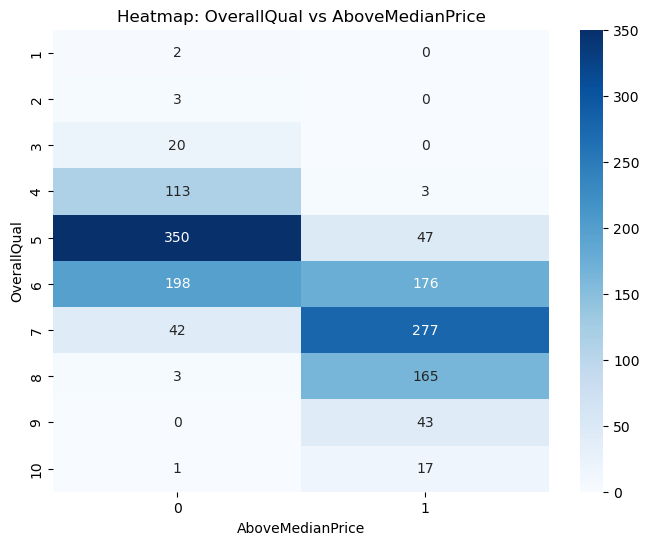

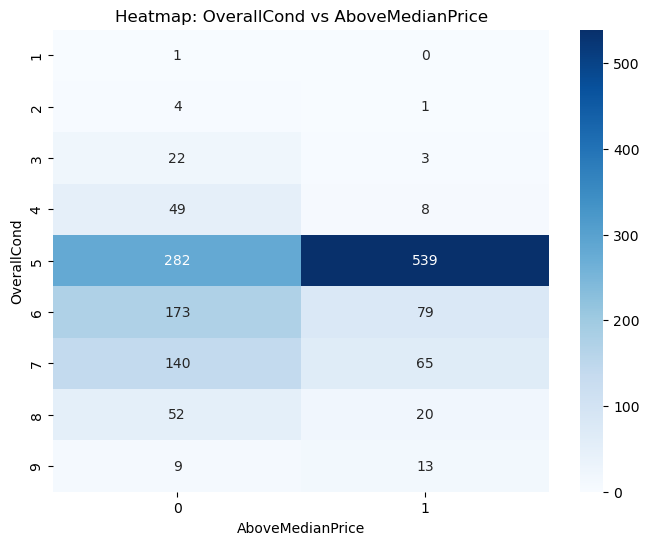

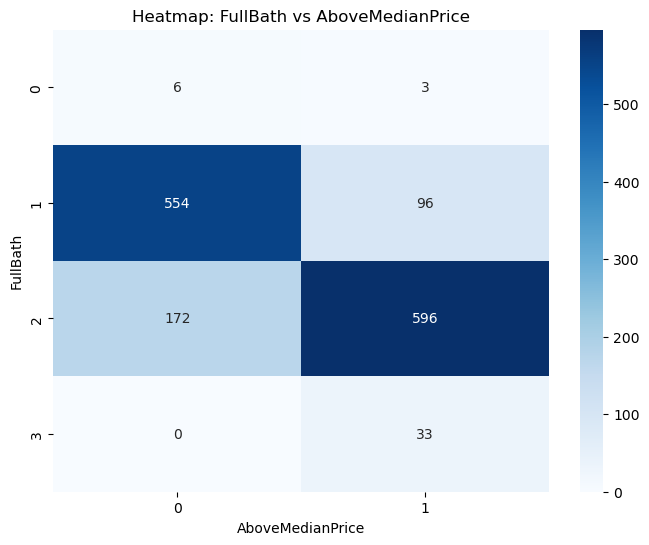

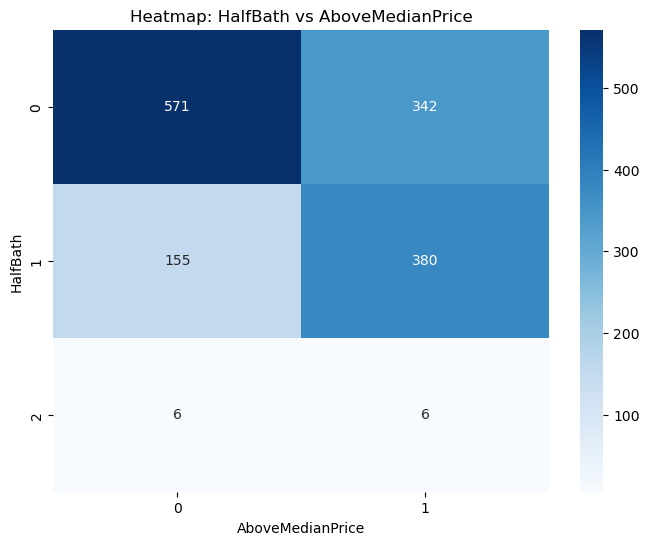

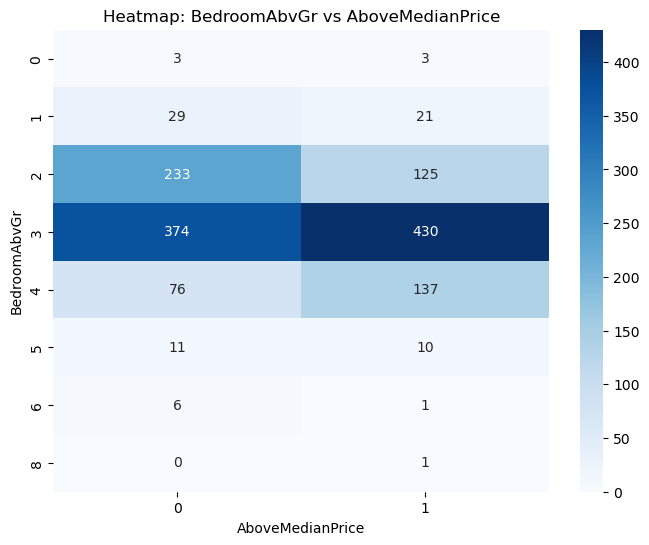

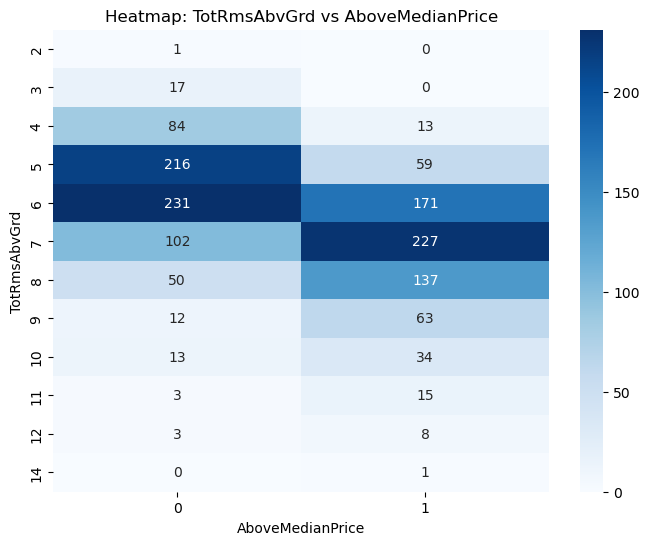

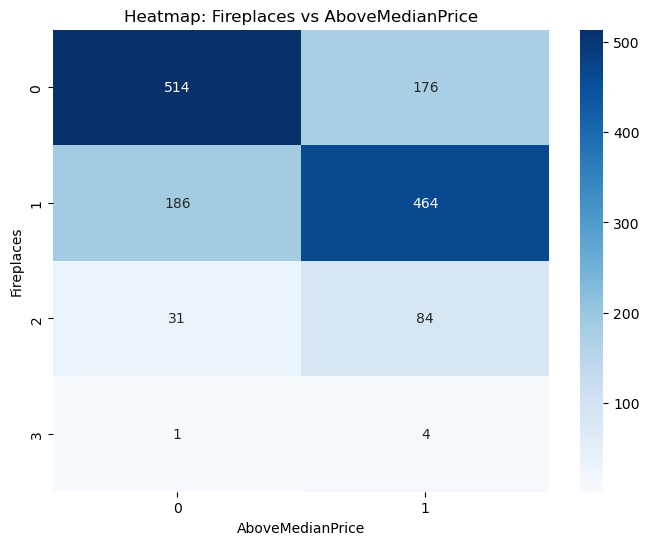

In [5]:
correlation_matrix = df.corr()
correlations_median_value = correlation_matrix['AboveMedianPrice']
for column, correlation in correlations_median_value.iteritems():
    print(f"Correlation between AboveMedianPrice and {column}: {correlation:.2f}")

import matplotlib.pyplot as plt
import seaborn as sns
columns_to_compare = [
     'OverallQual', 'OverallCond', 
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 
    'Fireplaces'
]
for col in columns_to_compare:
    plt.figure(figsize=(8, 6))
    heatmap_data = pd.crosstab(df[col], df['AboveMedianPrice'])
    sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Heatmap: {col} vs AboveMedianPrice')
    plt.xlabel('AboveMedianPrice')
    plt.ylabel(col)

In [6]:
df_clean = df.drop(columns=['BedroomAbvGr', 'OverallCond'])

plotting columns ['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea']
grid is 3x4
[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]
column LotArea
plotting on axes [0,0]
column OverallQual
plotting on axes [0,1]
column OverallCond
plotting on axes [0,2]
column TotalBsmtSF
plotting on axes [0,3]
column FullBath
plotting on axes [1,0]
column HalfBath
plotting on axes [1,1]
column BedroomAbvGr
plotting on axes [1,2]
column TotRmsAbvGrd
plotting on axes [1,3]
column Fireplaces
plotting on axes [2,0]
column GarageArea
plotting on axes [2,1]


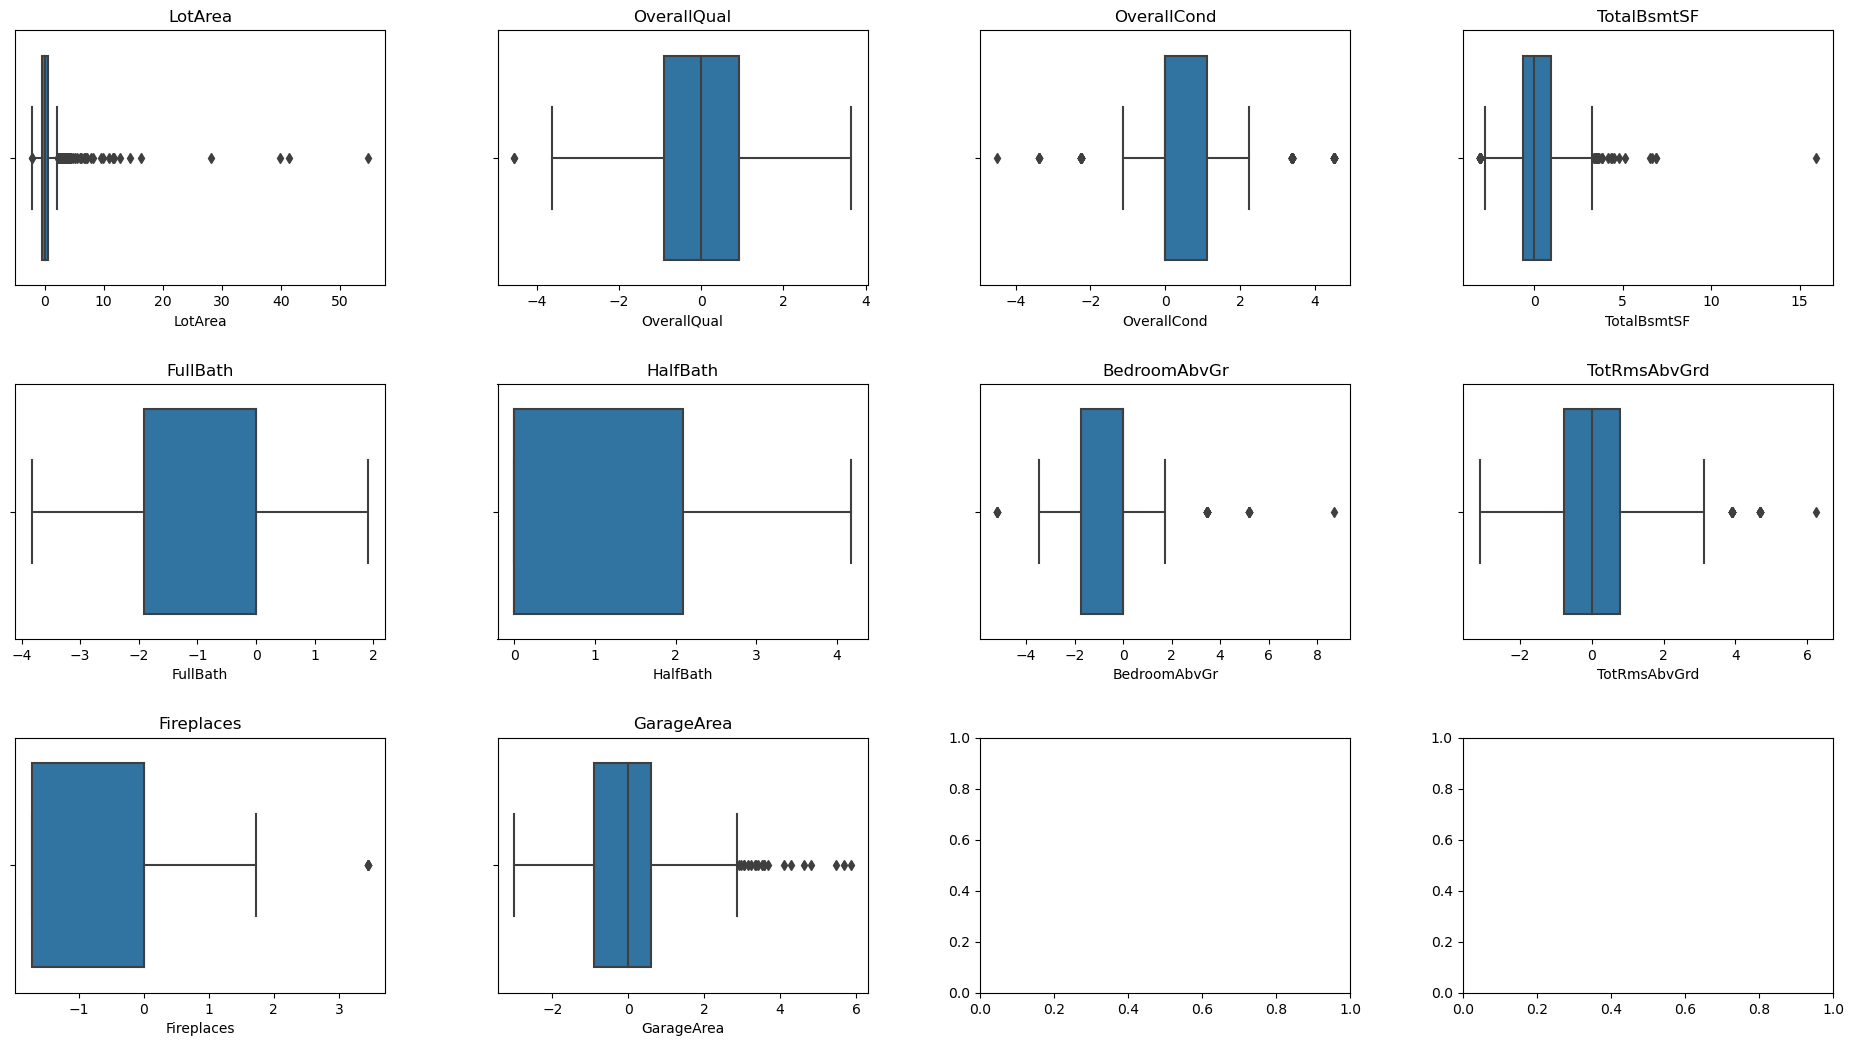

In [7]:
def z_score(data, columns):
    for column in columns:
        median_val = data[column].median()
        mad_val = (data[column] - data[column].mean()).abs().mean()

        data[column] = (data[column] - median_val) / mad_val

    return data
X_z = df.drop('AboveMedianPrice', axis=1)
Y_z = df['AboveMedianPrice']
scaled_data_z = z_score(X_z, X_z.columns)
X_scale_z = pd.DataFrame(scaled_data_z, columns=X_z.columns)

plot_distributions(X_scale_z, X_scale_z.columns)

In [8]:
columns_to_check = ["LotArea", "TotalBsmtSF", "GarageArea"]
outliers_index = set()

for column in columns_to_check:
    threshold_low = -3
    threshold_high = 3

    outliers_low = X_scale_z[X_scale_z[column] < threshold_low].index
    outliers_high = X_scale_z[X_scale_z[column] > threshold_high].index
    outliers = outliers_low.union(outliers_high)

    outliers_index.update(outliers)


#print("Unique Outliers Index:")
#print(outliers_index)
#print("Number of Unique Outliers:", len(outliers_index))

df_cleaned = df_clean.drop(index=outliers_index, errors='ignore')
#print("Original size:", len(df))
#print("Cleaned size:", len(df_cleaned))
#X_scale_z_clean = X_scale_z.drop(index=outliers_index, errors='ignore')
#plot_distributions(X_scale_z_clean, X_scale_z_clean.columns)



In [9]:
dataset = df_cleaned.values
X = dataset[:,0:8]
Y = dataset[:,8]
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)



In [ ]:
'''
from keras.optimizers import Adam
import keras_tuner as kt
from keras.layers import Dropout
from keras import regularizers


def DNN_builder(hp):
    model = Sequential()
    
    model.add(Dense(
        units = hp.Int('units_1', min_value = 32, max_value = 512, step = 32),
        activation = 'relu',
        input_shape = (8,),
        kernel_regularizer = regularizers.l2(hp.Choice('l2_1', values = [0.01, 0.02]))
    ))
    
    model.add(Dropout(hp.Float('dropout_1', min_value = 0.1, max_value = 0.5, step = 0.1)))
    
    model.add(Dense(
        units = hp.Int('units_2', min_value=32, max_value=512, step=32),
        activation = 'relu',
        kernel_regularizer = regularizers.l2(hp.Choice('l2_2', values=[0.01, 0.02]))
    ))
    
    model.add(Dropout(hp.Float('dropout_3', min_value=0.1, max_value=0.5, step=0.1)))
    
    model.add(Dense(
        units = hp.Int('units_3', min_value= 32, max_value = 512, step = 32),
        activation = 'relu',
        kernel_regularizer = regularizers.l2(hp.Choice('l2_3', values = [0.01, 0.02]))
    ))
    
    model.add(Dropout(hp.Float('dropout_3', min_value= 0.1, max_value = 0.5, step = 0.1)))
    
    model.add(Dense(
        units = hp.Int('units_4', min_value = 32, max_value = 512, step = 32),
        activation ='relu',
        kernel_regularizer = regularizers.l2(hp.Choice('l2_4', values = [0.01, 0.02]))
    ))
    
    model.add(Dropout(hp.Float('dropout_4', min_value = 0.1, max_value = 0.5, step = 0.1)))
    
    
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(
        optimizer = Adam(learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])),
        loss = 'binary_crossentropy',
        metrics = ['accuracy']
    )
    
    return model


from keras_tuner import RandomSearch

tuner= RandomSearch(
    DNN_builder,
    objective = 'val_accuracy',
    max_trials = 500,
    executions_per_trial = 2,
    directory = 'my_dir',
    project_name = 'dnn_houseprice_tuning'
)

tuner.search(X_train, Y_train, epochs = 50, validation_data = (X_val, Y_val), batch_size = 32)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Optimal number of units: {best_hps.get('units_1')}
Optimal L2 regularization (layer 1): {best_hps.get('l2_1')}
Optimal dropout rate (layer 1): {best_hps.get('dropout_1')}
Optimal learning rate: {best_hps.get('learning_rate')}
""")
print(f"""
Optimal number of units: {best_hps.get('units_2')}
Optimal L2 regularization (layer 1): {best_hps.get('l2_2')}
Optimal dropout rate (layer 1): {best_hps.get('dropout_3')}
Optimal learning rate: {best_hps.get('learning_rate')}
""")
print(f"""
Optimal number of units: {best_hps.get('units_3')}
Optimal L2 regularization (layer 1): {best_hps.get('l2_3')}
Optimal dropout rate (layer 1): {best_hps.get('dropout_3')}
Optimal learning rate: {best_hps.get('learning_rate')}
""")
print(f"""
Optimal number of units: {best_hps.get('units_4')}
Optimal L2 regularization (layer 1): {best_hps.get('l2_4')}
Optimal dropout rate (layer 1): {best_hps.get('dropout_4')}
Optimal learning rate: {best_hps.get('learning_rate')}
""")

'''

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
from keras.layers import Dropout
from keras import regularizers

model = Sequential([
    Dense(160, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(8,)),
    Dropout(0.2),
    Dense(320, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(480, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001)),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', metrics.Precision(name='precision'), metrics.Recall(name='recall')])

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

print("--------BREAK--------")
model_eval = model.evaluate(X_test, Y_test)
model_Fscore = F_score(model_eval[2], model_eval[3])

Epoch 1/100
30/30 [==============================] - 2s 16ms/step - loss: 1.4990 - accuracy: 0.6259 - precision: 0.5761 - recall: 0.8813 - val_loss: 1.1173 - val_accuracy: 0.6900 - val_precision: 0.6067 - val_recall: 0.9681
Epoch 2/100
30/30 [==============================] - 0s 8ms/step - loss: 0.9034 - accuracy: 0.7803 - precision: 0.7461 - recall: 0.8330 - val_loss: 0.7280 - val_accuracy: 0.8200 - val_precision: 0.8625 - val_recall: 0.7340
Epoch 3/100
30/30 [==============================] - 0s 8ms/step - loss: 0.6477 - accuracy: 0.8382 - precision: 0.8319 - recall: 0.8374 - val_loss: 0.5469 - val_accuracy: 0.8650 - val_precision: 0.8681 - val_recall: 0.8404
Epoch 4/100
30/30 [==============================] - 0s 8ms/step - loss: 0.5564 - accuracy: 0.8532 - precision: 0.8299 - recall: 0.8791 - val_loss: 0.5725 - val_accuracy: 0.8550 - val_precision: 0.9333 - val_recall: 0.7447
Epoch 5/100
30/30 [==============================] - 0s 8ms/step - loss: 0.5177 - accuracy: 0.8521 - precis

Epoch 38/100
30/30 [==============================] - 0s 8ms/step - loss: 0.3070 - accuracy: 0.8864 - precision: 0.8785 - recall: 0.8901 - val_loss: 0.3147 - val_accuracy: 0.8900 - val_precision: 0.8750 - val_recall: 0.8936
Epoch 39/100
30/30 [==============================] - 0s 8ms/step - loss: 0.3101 - accuracy: 0.8896 - precision: 0.8826 - recall: 0.8923 - val_loss: 0.3148 - val_accuracy: 0.8850 - val_precision: 0.8447 - val_recall: 0.9255
Epoch 40/100
30/30 [==============================] - 0s 8ms/step - loss: 0.3036 - accuracy: 0.8960 - precision: 0.8874 - recall: 0.9011 - val_loss: 0.3305 - val_accuracy: 0.8800 - val_precision: 0.8977 - val_recall: 0.8404
Epoch 41/100
30/30 [==============================] - 0s 8ms/step - loss: 0.3049 - accuracy: 0.8971 - precision: 0.8945 - recall: 0.8945 - val_loss: 0.3142 - val_accuracy: 0.8900 - val_precision: 0.8673 - val_recall: 0.9043
Epoch 42/100
30/30 [==============================] - 0s 8ms/step - loss: 0.2932 - accuracy: 0.9068 - pr

In [12]:
print(model_eval[1])
print(model_Fscore)

0.9100000262260437
0.9090909361839294


In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

plt.plot(hist.history['precision'])
plt.plot(hist.history['val_precision'])
plt.title('Model precision')
plt.ylabel('precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist.history['recall'])
plt.plot(hist.history['val_recall'])
plt.title('Model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


"plt.plot(hist.history['loss'])\nplt.plot(hist.history['val_loss'])\nplt.title('Model loss')\nplt.ylabel('Loss')\nplt.xlabel('Epoch')\nplt.legend(['Train', 'Val'], loc='upper right')\nplt.show()\n\nplt.plot(hist.history['accuracy'])\nplt.plot(hist.history['val_accuracy'])\nplt.title('Model accuracy')\nplt.ylabel('Accuracy')\nplt.xlabel('Epoch')\nplt.legend(['Train', 'Val'], loc='lower right')\nplt.show()\n\nplt.plot(hist.history['precision'])\nplt.plot(hist.history['val_precision'])\nplt.title('Model precision')\nplt.ylabel('precision')\nplt.xlabel('Epoch')\nplt.legend(['Train', 'Val'], loc='upper right')\nplt.show()\n\nplt.plot(hist.history['recall'])\nplt.plot(hist.history['val_recall'])\nplt.title('Model recall')\nplt.ylabel('recall')\nplt.xlabel('Epoch')\nplt.legend(['Train', 'Val'], loc='lower right')\nplt.show()\n"

In [14]:
#base model from workshop
base_model = Sequential([
    Dense(32, activation='relu', input_shape=(8,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

base_model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy', metrics.Precision(name='precision'), metrics.Recall(name='recall')])

base_hist = base_model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

base_model_eval = base_model.evaluate(X_test, Y_test)
base_model_Fscore = F_score(base_model_eval[2], base_model_eval[3])


Epoch 1/100
30/30 [==============================] - 1s 8ms/step - loss: 0.6972 - accuracy: 0.5113 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6929 - val_accuracy: 0.5650 - val_precision: 0.7333 - val_recall: 0.1170
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.6002 - precision: 0.6667 - recall: 0.3604 - val_loss: 0.6886 - val_accuracy: 0.5900 - val_precision: 0.5500 - val_recall: 0.7021
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.5863 - precision: 0.5444 - recall: 0.9297 - val_loss: 0.6853 - val_accuracy: 0.5650 - val_precision: 0.5198 - val_recall: 0.9787
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.5723 - precision: 0.5334 - recall: 0.9824 - val_loss: 0.6822 - val_accuracy: 0.5350 - val_precision: 0.5027 - val_recall: 0.9894
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.5584 -

Epoch 74/100
30/30 [==============================] - 0s 2ms/step - loss: 0.3012 - accuracy: 0.8842 - precision: 0.8668 - recall: 0.9011 - val_loss: 0.3433 - val_accuracy: 0.8550 - val_precision: 0.8037 - val_recall: 0.9149
Epoch 75/100
30/30 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.8853 - precision: 0.8655 - recall: 0.9055 - val_loss: 0.3404 - val_accuracy: 0.8500 - val_precision: 0.8019 - val_recall: 0.9043
Epoch 76/100
30/30 [==============================] - 0s 2ms/step - loss: 0.2970 - accuracy: 0.8853 - precision: 0.8686 - recall: 0.9011 - val_loss: 0.3414 - val_accuracy: 0.8400 - val_precision: 0.7768 - val_recall: 0.9255
Epoch 77/100
30/30 [==============================] - 0s 2ms/step - loss: 0.2956 - accuracy: 0.8875 - precision: 0.8676 - recall: 0.9077 - val_loss: 0.3373 - val_accuracy: 0.8600 - val_precision: 0.8056 - val_recall: 0.9255
Epoch 78/100
30/30 [==============================] - 0s 2ms/step - loss: 0.2932 - accuracy: 0.8875 - pr

In [15]:
print(base_model_eval[1])
print(base_model_Fscore)

0.8849999904632568
0.8888888990045265


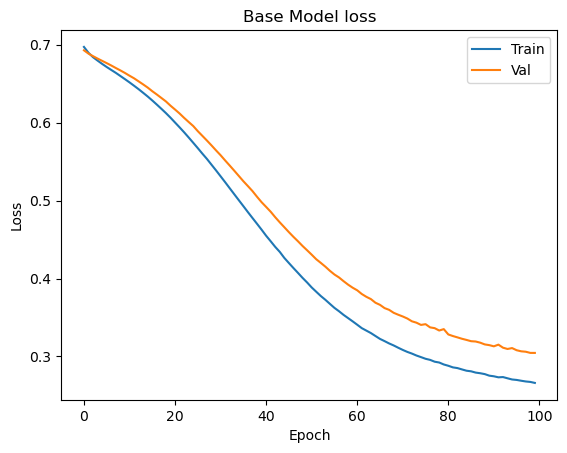

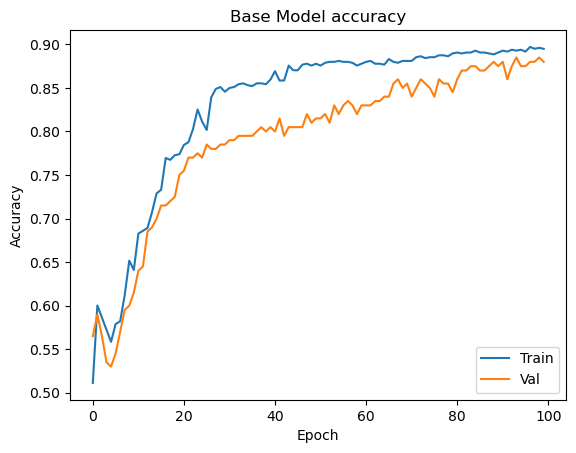

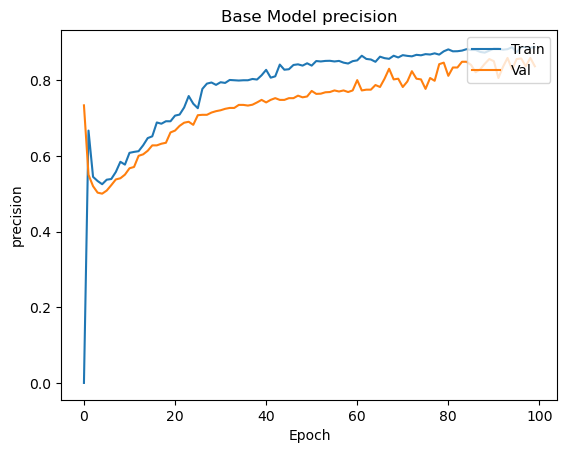

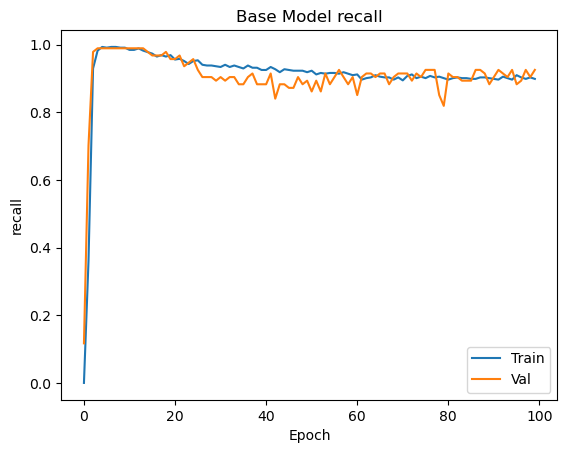

In [16]:
plt.plot(base_hist.history['loss'])
plt.plot(base_hist.history['val_loss'])
plt.title('Base Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(base_hist.history['accuracy'])
plt.plot(base_hist.history['val_accuracy'])
plt.title('Base Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

plt.plot(base_hist.history['precision'])
plt.plot(base_hist.history['val_precision'])
plt.title('Base Model precision')
plt.ylabel('precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(base_hist.history['recall'])
plt.plot(base_hist.history['val_recall'])
plt.title('Base Model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
